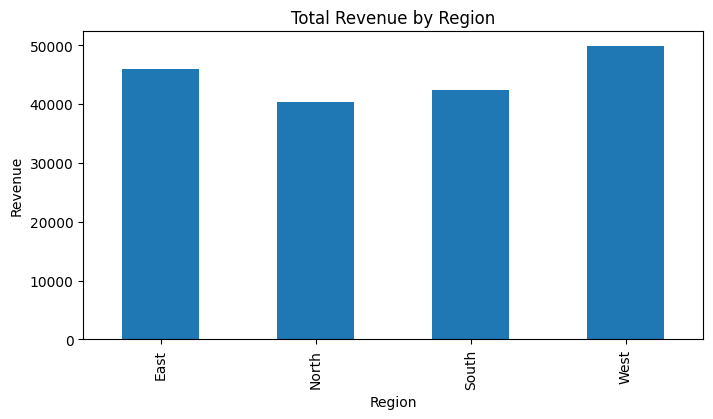

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
df = pd.read_csv('flower_sales.csv')

# Calculate total revenue by region and create a bar chart
revenue_by_region = df.groupby('region')['price'].sum()
revenue_by_region.plot.bar(figsize=(8, 4))
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

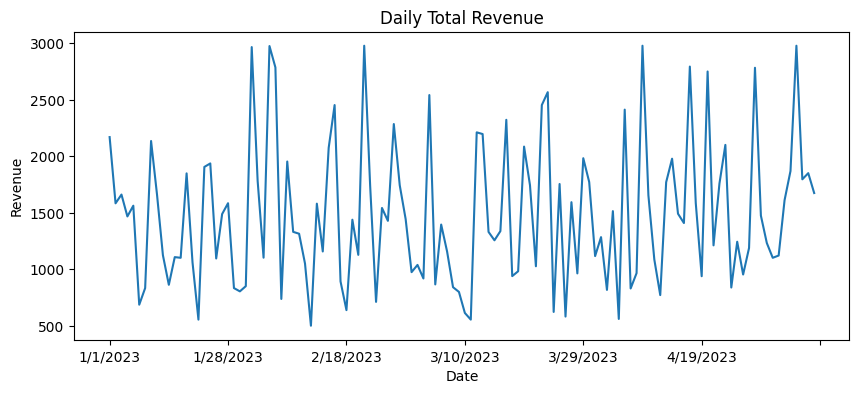

In [2]:
# Calculate daily total revenue and create a line chart
daily_revenue = df.groupby('date')['price'].sum()
daily_revenue.plot.line(figsize=(10, 4))
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

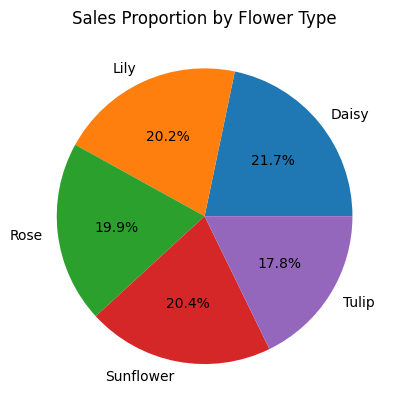

In [6]:
from sklearn.ensemble import RandomForestRegressor
# Calculate the sales proportion of each flower type and create a pie chart
flower_sales = df.groupby('flower')['count'].sum()
plt.pie(flower_sales, labels=flower_sales.index, autopct='%1.1f%%')
plt.title('Sales Proportion by Flower Type')
plt.show()

In [4]:
# Find the top 5 most profitable flowers
top5_profit_flowers = df.groupby('flower')['profit'].sum().nlargest(5)
print('Top 5 Most Profitable Flowers:')
print(top5_profit_flowers)

Top 5 Most Profitable Flowers:
flower
Rose         30532.5
Tulip        25037.0
Lily         15823.0
Daisy         9905.0
Sunflower     9517.0
Name: profit, dtype: float64


In [7]:
from sklearn.ensemble import RandomForestRegressor
# Forecast the total revenue for the next 7 days using Random Forest Regressor
revenue_ts = df.groupby('date')['price'].sum().reset_index()
revenue_ts['date'] = pd.to_datetime(revenue_ts['date'])
revenue_ts['day'] = revenue_ts['date'].dt.day

X = revenue_ts['day'].values.reshape(-1, 1)
y = revenue_ts['price'].values

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

future_dates = pd.date_range(start=revenue_ts['date'].max(), periods=8, freq='D')[1:]
future_days = future_dates.day.values.reshape(-1, 1)

forecast = model.predict(future_days)
print('Forecasted Total Revenue for the Next 7 Days:')
print(pd.Series(forecast, index=future_dates))

Forecasted Total Revenue for the Next 7 Days:
2023-05-01    1836.360355
2023-05-02    1805.565833
2023-05-03    1185.813321
2023-05-04    1282.622365
2023-05-05    1743.691246
2023-05-06    1885.061446
2023-05-07    2132.975299
Freq: D, dtype: float64
